In [1]:
%cd ../..

/home/armand/PhD/FFF_fiberlearning


In [2]:
from fff.data import load_dataset

datasets = load_dataset("2moons")

INFO: Using pytorch backend
INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


2moons


In [6]:
from fff import FreeFormInjectiveFlow, FreeFormInjectiveFlowHParams
from fff.model import ResNet

config = { 
    "latent_distribution": {
      "name": "normal",
    },
    "data_set": {
      "name": "2moons",
    },
    
    "noise": 0.1,
    
    "loss_weights": {
      "nll": 1,
      "noisy_reconstruction": 10,
    },
    
    "models": 
        [{"name": "fff.model.ResNet",
        "latent_dim": 1,
        "layers_spec": [[256, 256], [256, 256]]}],
    
    
    "lr_scheduler": "onecyclelr",
    
    "batch_size": 128,
    "optimizer": {
      "name": "adam",
      "lr": 0.001,
      #weight_decay: 0.0001
    },
    
    "max_epochs": 25,
    
    "num_workers": 4,
    "gradient_clip": 3.0,
    "accelerator": "gpu",
}

SubjectModelHParams = FreeFormInjectiveFlowHParams(**config)

In [7]:
SubjectModel = FreeFormInjectiveFlow(hparams=SubjectModelHParams)

2moons
cond_dim:  0
latent_dim:  1


In [8]:
SubjectModel.fit(
    logger_kwargs={"save_dir": "notebooks/SubjectModels/saved_models", "name": "SubjectModel_ResNet_2moons"},
)

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type       | Params
--------------------------------------
0 | models | Sequential | 268 K 
--------------------------------------
268 K     Trainable params
0         Non-trainable params
268 K     Total params
1.073     Total estimate

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=25` reached.
INFO: `Trainer.fit` stopped: `max_epochs=25` reached.


{'training/z 1D-Wasserstein-1': 0.1425573080778122,
 'training/z std': 0.8936209678649902,
 'training/loss': 1.1879624128341675,
 'training/nll': 0.25706756114959717,
 'training/reconstruction': 0.08787433803081512,
 'training/noisy_reconstruction': 0.09308949112892151,
 'training/sqr_reconstruction': 0.012579234316945076,
 'validation/z 1D-Wasserstein-1': 0.15387478470802307,
 'validation/z std': nan,
 'validation/loss': 3.2056221961975098,
 'validation/nll': 2.3609840869903564,
 'validation/vol_change_encoder': -0.9035239219665527,
 'validation/vol_change_decoder': -0.9465206265449524,
 'validation/nll_encoder': 2.3179874420166016,
 'validation/nll_decoder': 2.3609840869903564,
 'validation/reconstruction': 0.0874020904302597,
 'validation/noisy_reconstruction': 0.08446379750967026,
 'validation/sqr_reconstruction': 0.011579187586903572,
 'validation/masked_reconstruction': 0.08446380496025085,
 'validation/z_reconstruction_encoder': 0.0024436949752271175,
 'validation/fiber_loss': n

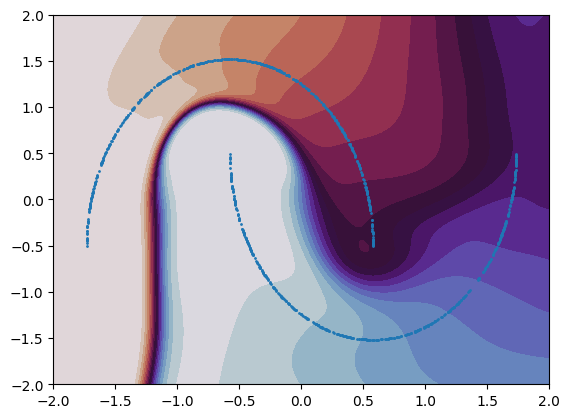

In [16]:
from fff.evaluate.plots import plot_latent_codes,plot_latent_codes_2d_1d

plot_latent_codes_2d_1d(SubjectModel)

In [25]:
from torch.utils.data import TensorDataset
import torch

@torch.no_grad()
def get_dataset_from_subject_model(SubjectModel):
    train_set, val_set, test_set = SubjectModel.train_data[:], SubjectModel.val_data[:], SubjectModel.test_data[:]
    train_conditioned, val_conditioned, test_conditioned = SubjectModel.apply_conditions(train_set), SubjectModel.apply_conditions(val_set), SubjectModel.apply_conditions(test_set)
    train_z, val_z, test_z = SubjectModel.encode(train_conditioned.x_noisy, train_conditioned.condition), \
                             SubjectModel.encode(val_conditioned.x_noisy, val_conditioned.condition), \
                             SubjectModel.encode(test_conditioned.x_noisy, test_conditioned.condition)

    datasets = (
        TensorDataset(train_conditioned.x_noisy, train_z),
        TensorDataset(val_conditioned.x_noisy, val_z),
        TensorDataset(test_conditioned.x_noisy, test_z),
    )
    return datasets

In [26]:
datasets_fiber_model = get_dataset_from_subject_model(SubjectModel)

In [28]:
import os

os.makedirs("datasets/SubjectModel_ResNet_2moons", exist_ok=True)

torch.save(datasets_fiber_model[0], "datasets/SubjectModel_ResNet_2moons/train.pt")
torch.save(datasets_fiber_model[1], "datasets/SubjectModel_ResNet_2moons/val.pt")
torch.save(datasets_fiber_model[2], "datasets/SubjectModel_ResNet_2moons/test.pt")

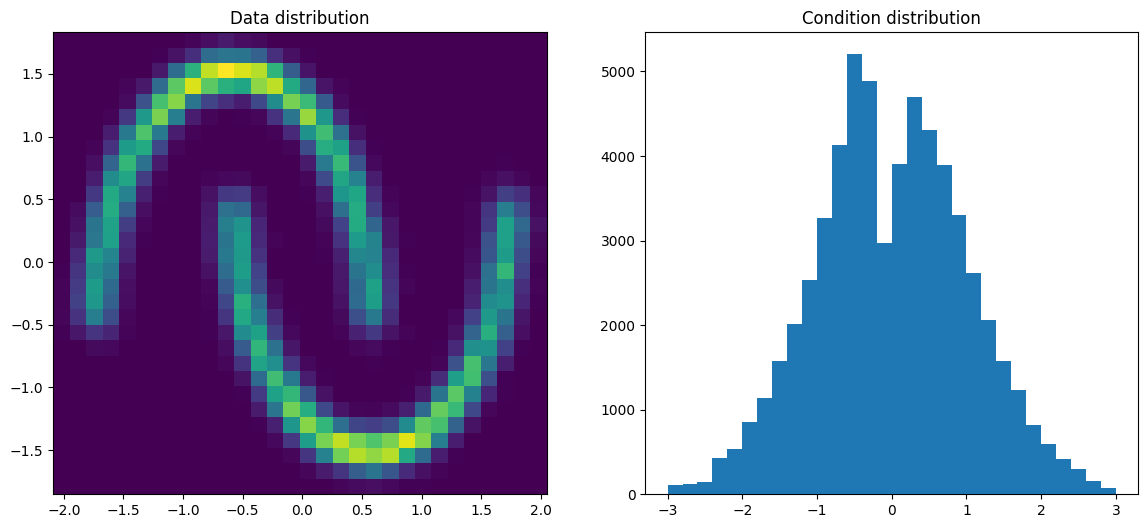

In [34]:
# Sanity check
import matplotlib.pyplot as plt

ds = torch.load("datasets/SubjectModel_ResNet_2moons/train.pt")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Data distribution")
plt.hist2d(*ds[:][0].T, bins=30)
plt.subplot(1, 2, 2)
plt.title("Condition distribution")
plt.hist(ds[:][1], bins=30, range=[-3, 3])
plt.show()